In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv("data.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1593,2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098
1594,2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230
1595,2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658
1596,2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


<AxesSubplot:xlabel='Open'>

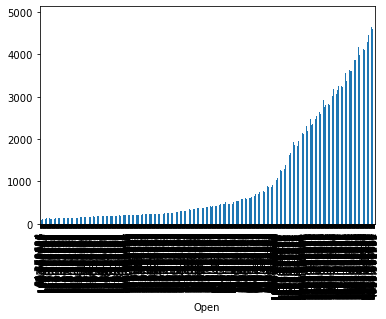

In [4]:
data.groupby('Open')['High'].mean().plot.bar()

In [5]:
#CORRELATION
correlation = data.corr(method='pearson')
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999255,0.998307,0.997902,0.997902,0.554001
High,0.999255,1.000000,0.998189,0.998938,0.998938,0.562732
Low,0.998307,0.998189,1.000000,0.998974,0.998974,0.537763
Close,0.997902,0.998938,0.998974,1.000000,1.000000,0.552345
Adj Close,0.997902,0.998938,0.998974,1.000000,1.000000,0.552345
Volume,0.554001,0.562732,0.537763,0.552345,0.552345,1.000000


In [6]:
data .columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,1026.060794,1061.282123,986.461636,1027.554834,1027.554834,1.245347e+10
std,1230.979724,1270.582395,1185.384747,1231.398723,1231.398723,1.121937e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,196.428421,201.416004,188.846440,196.605812,196.605812,3.154440e+09
50%,386.373398,396.498703,375.446228,386.445556,386.445556,9.525409e+09
75%,1647.892822,1721.577515,1568.554352,1659.367554,1659.367554,1.764118e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [8]:
High_data  = data [['Date','High']]
print(High_data .shape)
High_data .head(500)

(1598, 2)


,Date,High
0,2017-11-09,329.451996
1,2017-11-10,324.717987
2,2017-11-11,319.453003
3,2017-11-12,319.153015
4,2017-11-13,328.415009
...,...,...
495,2019-03-19,140.989059
496,2019-03-20,140.945572
497,2019-03-21,141.003235
498,2019-03-22,138.794296


**VISUALIZATIONS**

**Line plot of the closing price**

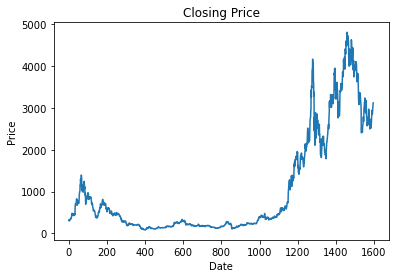

In [9]:

# Visualization 1: Line plot of the closing price
plt.plot(data['Close'])
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


**Bar chart of the trading volume**

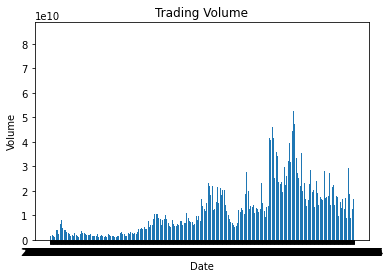

In [10]:
plt.bar(data['Date'], data['Volume'])
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

**Scatter plot of the high and low prices**

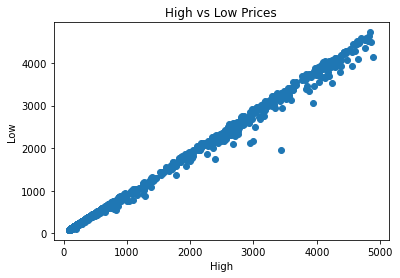

In [11]:
plt.scatter(data['High'], data['Low'])
plt.title('High vs Low Prices')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

In [12]:
def mean(t):
    return(float(sum(High)) / len(low))
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


**Histogram of the opening prices**

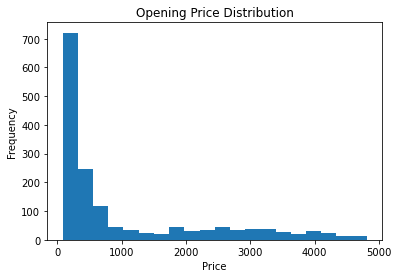

In [79]:
plt.hist(data['Open'], bins=20)
plt.title('Opening Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
data .isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

**Line plot of the adjusted closing price**

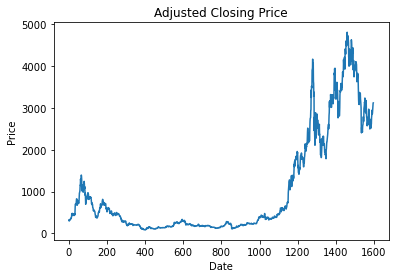

In [14]:
plt.plot(data['Adj Close'])
plt.title('Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [15]:
data .isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
embedding_vector_length = 32
model = Sequential() 
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

**Stacked bar chart of the high and low prices**

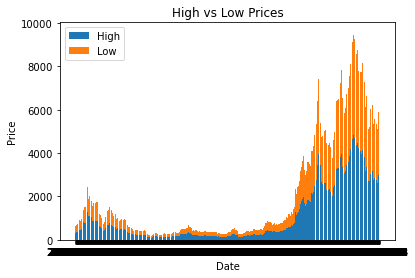

In [17]:
plt.bar(data['Date'], data['High'], label='High')
plt.bar(data['Date'], data['Low'], label='Low', bottom=data['High'])
plt.title('High vs Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Line plot of the opening and closing prices**

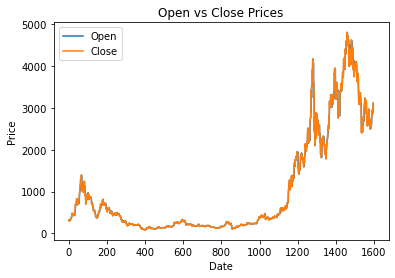

In [14]:
plt.plot(data['Open'], label='Open')
plt.plot(data['Close'], label='Close')
plt.title('Open vs Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
data = pd.read_csv(filepath_or_buffer = 'data.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')
data.shape

(1598, 7)

**Area plot of the trading volume**

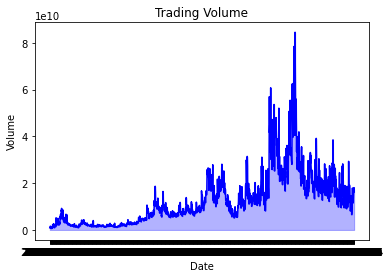

In [15]:
plt.fill_between(data['Date'], data['Volume'], color='blue', alpha=0.3)
plt.plot(data['Date'], data['Volume'], color='blue')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [19]:
# print("Classfication for ANN  in each Stock Values")
print("*********************************")
print(data.count().sum())

print("Classfication for ANN  in each Stock Values")
print("*********************************")
print(data.count().sum())

*********************************
11186
Classfication for ANN  in each Stock Values
*********************************
11186


In [20]:
data.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
data['Open']

0        308.644989
1        320.670990
2        298.585999
3        314.690002
4        307.024994
           ...     
1593    2860.103271
1594    2897.774170
1595    2973.145020
1596    3031.060791
1597    3109.523438
Name: Open, Length: 1598, dtype: float64

In [22]:
#CORRELATION
correlation = data.corr(method='pearson')
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999255,0.998307,0.997902,0.997902,0.554001
High,0.999255,1.000000,0.998189,0.998938,0.998938,0.562732
Low,0.998307,0.998189,1.000000,0.998974,0.998974,0.537763
Close,0.997902,0.998938,0.998974,1.000000,1.000000,0.552345
Adj Close,0.997902,0.998938,0.998974,1.000000,1.000000,0.552345
Volume,0.554001,0.562732,0.537763,0.552345,0.552345,1.000000


In [23]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,1026.060794,1061.282123,986.461636,1027.554834,1027.554834,1.245347e+10
std,1230.979724,1270.582395,1185.384747,1231.398723,1231.398723,1.121937e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,196.428421,201.416004,188.846440,196.605812,196.605812,3.154440e+09
50%,386.373398,396.498703,375.446228,386.445556,386.445556,9.525409e+09
75%,1647.892822,1721.577515,1568.554352,1659.367554,1659.367554,1.764118e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [24]:
data.duplicated().sum()

0

In [25]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992


In [26]:
data['Close'].value_counts()

320.884003     1
368.855927     1
377.441833     1
379.484039     1
381.190765     1
              ..
171.447800     1
171.874664     1
170.046524     1
173.751266     1
3122.535889    1
Name: Close, Length: 1598, dtype: int64

In [27]:
data['Adj Close'].value_counts()

320.884003     1
368.855927     1
377.441833     1
379.484039     1
381.190765     1
              ..
171.447800     1
171.874664     1
170.046524     1
173.751266     1
3122.535889    1
Name: Adj Close, Length: 1598, dtype: int64

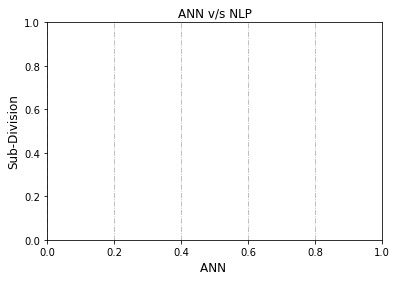

In [28]:
plt.xlabel("ANN ",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("ANN v/s NLP")
plt.grid(axis="x",linestyle="-.")
plt.show()

*Above plot shows the total Cry Stock Data from year 2017-2022 in each subdivision,
 from the above plot we note that:-
 1)Data yea have recieved the least stock price prediction  value

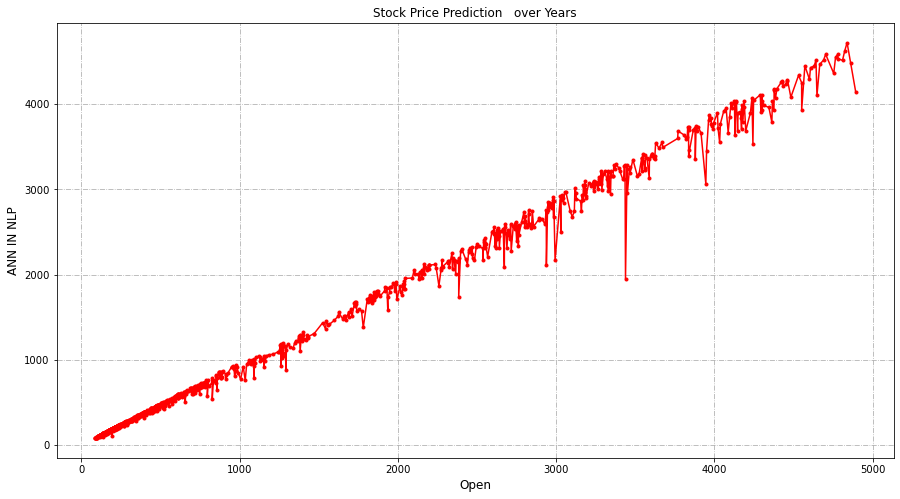

In [29]:
plt.figure(figsize=(15,8))
data.groupby("High").sum()['Low'].plot(kind="line",color="r",marker=".")
plt.xlabel("Open",size=12)
plt.ylabel("ANN IN NLP",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Stock Price Prediction   over Years")
plt.show()

Above graph shows the Stock Price Prediction  from 2017-2022 in India,
 we observe that :-
 1)The maximum stock price prediction  value Detection Comparactions Algorthim was in ANN & NLP

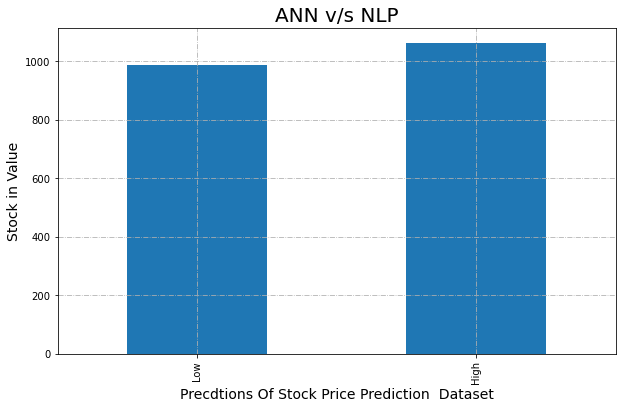

In [30]:
plt.figure(figsize=(10,6))
data[['Low','High']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("ANN v/s NLP",size=20)
plt.xlabel("Precdtions Of Stock Price Prediction  Dataset",size=14)
plt.ylabel("Stock in Value",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

In [31]:
data_df = data[['High','Low']]
print(data_df.shape)
data_df.head(200)

(1598, 2)


,High,Low
0,329.451996,307.056000
1,324.717987,294.541992
2,319.453003,298.191986
3,319.153015,298.513000
4,328.415009,307.024994
...,...,...
195,651.635986,572.952026
196,610.817993,557.205994
197,617.185974,575.624023
198,606.174988,583.512024


In [32]:
sentiment_label = data_df.High.factorize()
sentiment_label

(array([   0,    1,    2, ..., 1595, 1596, 1597], dtype=int64),
 Float64Index([ 329.451996,  324.717987,  319.453003,  319.153015,  328.415009,
                340.177002,  340.911987,  336.158997,  334.963989,  349.615997,
               ...
               2781.307129, 2826.160645, 2973.616211, 2979.987061, 2956.965576,
               2954.556641, 3040.382813, 3036.752197, 3118.387695,  3182.82666],
              dtype='float64', length=1598))

In [33]:
sentiment_label = data_df.Low.factorize()
sentiment_label

(array([   0,    1,    2, ..., 1595, 1596, 1597], dtype=int64),
 Float64Index([    307.056,  294.541992,  298.191986,     298.513,  307.024994,
                   316.763,  329.812988,  323.605988,   327.52301,  327.687012,
               ...
               2610.764404, 2751.560791, 2774.855713, 2910.802246, 2826.107422,
               2838.250488, 2892.544434, 2933.306641,  3012.32666, 3097.624268],
              dtype='float64', length=1598))

In [34]:
data_df["High"].value_counts()

329.451996     1
369.768127     1
381.208771     1
387.296173     1
387.375671     1
              ..
176.850784     1
173.069122     1
174.420776     1
176.705811     1
3182.826660    1
Name: High, Length: 1598, dtype: int64

No handles with labels found to put in legend.


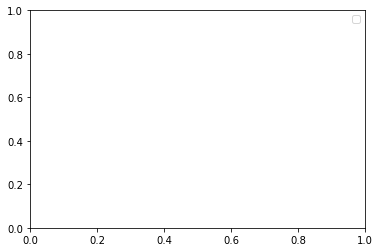

<Figure size 432x288 with 0 Axes>

In [102]:
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


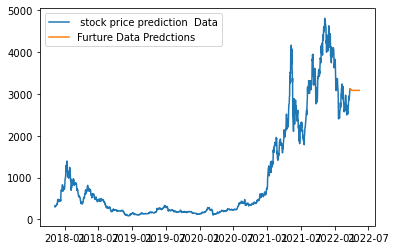

2022-03-26    3117.677202
2022-03-27    3116.047499
2022-03-28    3106.858188
2022-03-29    3104.128212
2022-03-30    3096.133545
2022-03-31    3096.153822
2022-04-01    3101.399999
2022-04-02    3098.852928
2022-04-03    3094.326433
2022-04-04    3090.781661
2022-04-05    3085.951303
2022-04-06    3085.121140
2022-04-07    3085.329866
2022-04-08    3085.395778
2022-04-09    3085.773989
2022-04-10    3085.886286
2022-04-11    3086.215203
2022-04-12    3086.214369
2022-04-13    3085.998532
2022-04-14    3086.103323
2022-04-15    3086.289551
2022-04-16    3086.435389
2022-04-17    3086.634118
2022-04-18    3086.668273
2022-04-19    3086.659685
2022-04-20    3086.656974
2022-04-21    3086.641413
2022-04-22    3086.636793
2022-04-23    3086.623261
2022-04-24    3086.623295
2022-04-25    3086.632175
2022-04-26    3086.627864
2022-04-27    3086.620202
2022-04-28    3086.614202
2022-04-29    3086.606026
2022-04-30    3086.604621
2022-05-01    3086.604974
2022-05-02    3086.605086
2022-05-03  

In [35]:
# Load the historical data into a pandas dataframe
df = pd.read_csv('data.csv')

# Set the date column as the index
df.set_index('Date', inplace=True)

# Convert the index to a datetime object
df.index = pd.to_datetime(df.index)

# Select the 'Adj Close' column as the input data
data = df['Adj Close']

# Fit the SVM model to the entire dataset
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

# Forecast the next 2 years (730 days) of values
forecast_values = model_fit.forecast(steps=50)

# Plot the historical and forecasted values
plt.plot(data.index, data, label=' stock price prediction  Data')
plt.plot(forecast_values.index, forecast_values, label='Furture Data Predctions')
plt.legend()
plt.show()

print(forecast_values)